In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
import logging
logging.getLogger('googleapiclient.discovery_cache').setLevel(logging.ERROR)
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':'1Ks5brHA6QGAP1d_LEVx_bo8Vj7ha20AT'})
downloaded.GetContentFile('alphabet_data.csv') 

W1111 12:43:49.969990 140082784532352 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("alphabet_data.csv")

In [0]:
dataset.sample(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
162904,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28872,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
171053,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
332508,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
286065,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63352,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
62476,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311723,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
203975,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
dataset.shape

(372450, 785)

13


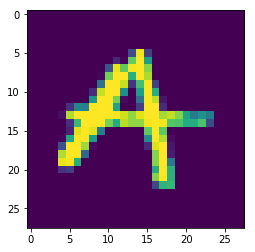

In [0]:
train_data = dataset.drop("0",axis=1)
ss = train_data.iloc[126,:].values.reshape(28,28)
ff = target = dataset["0"]
dd = ff.iloc[126548]
print dd
plt.imshow(ss)

In [0]:
# =============using ann================#
train_data = train_data.values
target = target.values
#normalization
X_data = train_data/255.0
from keras.utils import np_utils
Y_data = np_utils.to_categorical(target,26)
X = X_data
Y = Y_data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
print X_test.shape
print y_test.shape

Using TensorFlow backend.


(74490, 784)
(74490, 26)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(512,kernel_initializer = "uniform", activation = "relu",input_dim = 784))
model.add(Dropout(0.2))
model.add(Dense(512,kernel_initializer = "uniform", activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(26,kernel_initializer = "uniform", activation = "softmax"))
  

W1111 12:51:52.629144 140082784532352 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1111 12:51:52.631203 140082784532352 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 12:51:52.634140 140082784532352 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1111 12:51:52.648762 140082784532352 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1111 12:51:52.655612 140082784532352 depr

In [0]:
from keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='emnist.model.best.hdf5',verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,validation_split=0.2, callbacks=[checkpointer],verbose=1, shuffle=True)

W1111 10:23:55.070314 139783778645888 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1111 10:23:55.086112 139783778645888 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W1111 10:23:55.176903 139783778645888 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow_core/python/ops/math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1111 10:23:55.287184 139783778645888 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add inste

Train on 238368 samples, validate on 59592 samples
Epoch 1/10


W1111 10:23:56.602288 139783778645888 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1111 10:23:56.603734 139783778645888 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:199: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.

W1111 10:23:56.692255 139783778645888 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:206: The name tf.variables_initializer is deprecated. Please use tf.compat.v1.variables_initializer instead.



238368/238368 [==============================] - 11s 47us/step - loss: 0.2828 - acc: 0.9193 - val_loss: 0.1814 - val_acc: 0.9446

Epoch 00001: val_loss improved from inf to 0.18138, saving model to emnist.model.best.hdf5
Epoch 2/10
238368/238368 [==============================] - 7s 28us/step - loss: 0.1301 - acc: 0.9638 - val_loss: 0.1059 - val_acc: 0.9734

Epoch 00002: val_loss improved from 0.18138 to 0.10586, saving model to emnist.model.best.hdf5
Epoch 3/10
238368/238368 [==============================] - 7s 29us/step - loss: 0.1158 - acc: 0.9692 - val_loss: 0.0925 - val_acc: 0.9768

Epoch 00003: val_loss improved from 0.10586 to 0.09251, saving model to emnist.model.best.hdf5
Epoch 4/10
238368/238368 [==============================] - 7s 29us/step - loss: 0.1107 - acc: 0.9718 - val_loss: 0.0999 - val_acc: 0.9757

Epoch 00004: val_loss did not improve from 0.09251
Epoch 5/10
238368/238368 [==============================] - 7s 28us/step - loss: 0.1106 - acc: 0.9729 - val_loss: 0.09

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print accuracy

98.00375889397128


In [0]:
model.load_weights('emnist.model.best.hdf5')
model.save('eminst_alph_model.h5')

In [0]:
from google.colab import files
files.download("eminst_alph_model.h5")

In [0]:
#================using cnn===================#
train_data = dataset.drop("0",axis=1)
target = dataset["0"]
train_data = train_data.values
target = target.values
X_data = train_data/255.0
from keras.utils import np_utils
X_data = X_data.reshape(372450,28,28)
target = target.reshape(372450,1)
Y_data = np_utils.to_categorical(target,26)
X = X_data
Y = Y_data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)


In [0]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization
from keras.optimizers import RMSprop
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
model = Sequential()
model.add(Convolution2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

W1111 13:04:43.676796 140082784532352 module_wrapper.py:139] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
model.compile(loss="categorical_crossentropy",optimizer="Adadelta", metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test, y_test))


Train on 297960 samples, validate on 74490 samples
Epoch 1/10
297960/297960 [==============================] - 17s 56us/step - loss: 0.1768 - acc: 0.9497 - val_loss: 0.0669 - val_acc: 0.9822
Epoch 2/10
297960/297960 [==============================] - 13s 43us/step - loss: 0.0666 - acc: 0.9814 - val_loss: 0.0526 - val_acc: 0.9858
Epoch 3/10
297960/297960 [==============================] - 13s 43us/step - loss: 0.0512 - acc: 0.9856 - val_loss: 0.0467 - val_acc: 0.9872
Epoch 4/10
297960/297960 [==============================] - 13s 43us/step - loss: 0.0422 - acc: 0.9879 - val_loss: 0.0394 - val_acc: 0.9894
Epoch 5/10
297960/297960 [==============================] - 13s 43us/step - loss: 0.0366 - acc: 0.9897 - val_loss: 0.0346 - val_acc: 0.9910
Epoch 6/10
297960/297960 [==============================] - 13s 43us/step - loss: 0.0320 - acc: 0.9906 - val_loss: 0.0327 - val_acc: 0.9915
Epoch 7/10
297960/297960 [==============================] - 13s 44us/step - loss: 0.0284 - acc: 0.9918 - val_

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
__________

In [0]:
model.save('emnist_cnnalphabet_model.h5')
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]


In [0]:
! pip -q install git+https://www.github.com/keras-team/keras-contrib.git sklearn-crfsuite

     |████████████████████████████████| 706kB 3.9MB/s 


In [0]:
letters ={ 0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z', 26: '-'}

In [0]:
digit_2_letter = lambda x: [ letters[i] for i in x]

In [0]:
a = digit_2_letter(np.array([1,2,3,4,5,6]))
a

['B', 'C', 'D', 'E', 'F', 'G']

In [0]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
pred_tag  = np.argmax(y_pred,axis=1)
pred_tag = digit_2_letter(pred_tag)
y_true_tag = np.argmax(y_test,axis=1)
y_true_tag = digit_2_letter(y_true_tag)
report  = classification_report(y_pred = pred_tag,y_true = y_true_tag)
print(report)

              precision    recall  f1-score   support

           A       0.99      1.00      1.00      2774
           B       0.99      0.99      0.99      1734
           C       0.99      0.99      0.99      4682
           D       0.98      0.96      0.97      2027
           E       0.99      0.99      0.99      2288
           F       0.99      0.97      0.98       233
           G       0.99      0.99      0.99      1152
           H       0.99      0.99      0.99      1444
           I       0.99      0.98      0.99       224
           J       0.99      0.98      0.99      1699
           K       0.99      0.99      0.99      1121
           L       0.99      0.99      0.99      2317
           M       0.99      1.00      0.99      2467
           N       0.99      0.99      0.99      3802
           O       0.99      1.00      0.99     11565
           P       1.00      0.99      0.99      3868
           Q       0.99      0.99      0.99      1162
           R       0.99    

In [0]:
pred_tag.dtype

dtype('int64')

In [0]:
np.argmax(y_test,axis=1)

array([14,  2, 18, ...,  1, 12, 18])

In [0]:
from google.colab import files
files.download("emnist_cnnalphabet_model.h5")

In [0]:
letters ={ 0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j',
10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't',
20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '-'}

In [0]:
letters[0]

'a'